In [1]:
import pandas as pd
import joblib
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("../data/processed/engineered_cost.csv/engineered_dataset.csv").drop(columns=["Unnamed: 0"])


In [3]:
X = df.drop("medical charges", axis=1)
y = df["medical charges"]

In [4]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
models = {
    'LinearRegression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

In [7]:
results = []
best_model = None
best_r2 = -float("inf")

for name, model in models.items():
    model.fit(X_Train, y_Train)
    y_pred = model.predict(X_Test)

    mae = mean_absolute_error(y_Test, y_pred)
    mse = mean_squared_error(y_Test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_Test, y_pred)

    results.append({'Model': name, 'R2': r2, 'MAE': mae, 'RMSE': rmse})

    # Save best model
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
print(f"\nBest Model: {best_model.__class__.__name__}")
print(f"Best R² Score: {best_r2:.4f}")


Best Model: RandomForestRegressor
Best R² Score: 0.8611


In [65]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='R2', ascending=False, inplace=True)

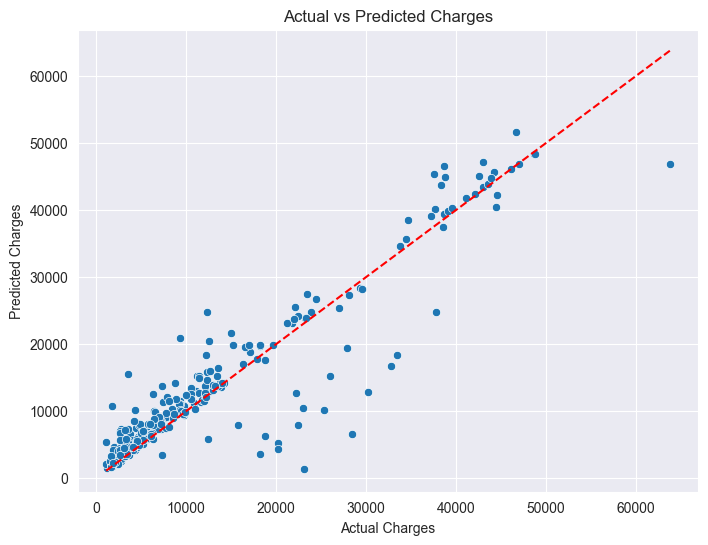

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_Test, y=best_model.predict(X_Test))
plt.plot([y_Test.min(), y_Test.max()], [y_Test.min(), y_Test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

In [70]:
os.mkdir('../../new_models', )
joblib.dump(best_model, '../../new_models/insurance_model_new.pkl')
with open('../../new_models/model_columns.json', 'w') as f:
    json.dump(list(X.columns), f)

print("✅ Best model saved to ../../new_models/insurance_model_new.pkl")
print("✅ Feature columns saved to model_columns.json")
print("📈 Model Performance:\n", results_df)

✅ Best model saved to ../../new_models/insurance_model_new.pkl
✅ Feature columns saved to model_columns.json
📈 Model Performance:
                  Model        R2          MAE          RMSE
4         RandomForest  0.861142  2598.655078   4643.016546
0     LinearRegression  0.788434  4179.724481   5731.083931
3         DecisionTree  0.735798  3070.136865   6404.456734
1  KNeighborsRegressor  0.559025  4702.054018   8274.105747
2                  SVR -0.072385  8598.003035  12902.962281
